# Libraries

In [113]:
import pandas as pd
import numpy as np
import ipywidgets as widgets

In [79]:
%matplotlib inline

from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
import mpld3

import seaborn as sns

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, FactorRange
from bokeh.io import show, output_file
from bokeh.models.tickers import FixedTicker
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead

from pprint import pprint

In [81]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy import stats

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA

# Functions

In [119]:
def kcolor(num):
    global kolors
    color_code = ['red','green','blue','orange','purple','brown','cadetblue','maroon','olive']
    kolors = len(color_code)
    if num in np.arange(0, len(color_code)):
        pickolor = color_code[num]
    else:
        pickolor = 'black'
    
    return pickolor
        

# Reading Data

In [173]:
# This widget will set the number of clusters.
# The limit is the number of the colors defined in kcolor function above (clusters will be color labeled)

kcolor(1)

wg_cluster = widgets.IntSlider()
wg_cluster.max = kolors
wg_cluster.min = 1
wg_cluster.value = 5

display(wg_cluster)

A Jupyter Widget

In [174]:
pc123_df = pd.read_csv('data/plots.csv', index_col=0)
vec123_df = pd.read_csv('data/vectors.csv', index_col=0)
feat_dict = pd.read_csv('data/Col_Dict.csv', index_col=0)

In [175]:
vec123_full = vec123_df.merge(feat_dict, left_index=True, right_on='brief_header', how='left')
vec123_full.index = vec123_full['brief_header']
vec123_full.drop(['brief_header','Ref'], axis=1, inplace=True)
#vec123_full

In [176]:
pc12_df = pc123_df.drop(['PC3'], axis=1)
pc13_df = pc123_df.drop(['PC2'], axis=1)
vec12_df = vec123_df.drop(['PC3'], axis=1)
vec13_df = vec123_df.drop(['PC2'], axis=1)

# K-mean clustering

In [177]:

pc12_a = np.array(pc12_df)

# Create a KMeans instance: model
model = KMeans(n_clusters=wg_cluster.value)

# Fit model to points
model.fit(pc12_a)

# Determine the cluster labels of new_points: labels
labels = model.predict(pc12_a)

color_list = []
for i in np.arange(len(labels)):
    color_list.append(kcolor(labels[i]))

pc12_df['cluster'] = color_list

In [178]:
vec12_a = np.array(vec12_df)

# Create a KMeans instance: model
model = KMeans(n_clusters=wg_cluster.value)

# Fit model to points
model.fit(vec12_a)

# Determine the cluster labels of new_points: labels
labels = model.predict(vec12_a)

color_list = []
for i in np.arange(len(labels)):
    color_list.append(kcolor(labels[i]))

vec12_df['cluster'] = color_list

In [179]:
vec12_df = vec12_df.merge(feat_dict, left_index=True, right_on='brief_header', how='left')
vec12_df.index = vec12_df['brief_header']
vec12_df.drop(['brief_header','Ref'], axis=1, inplace=True)
# vec12_df

# Plotting results
### Results will appear in new tab/window

In [181]:
output_file("pc1vs2k.html")


# SourceP and SourceV are hover texts for data points and eigenvectors respectively
sourcep = ColumnDataSource(data=dict(
    x=pc12_df['PC1'],
    y=pc12_df['PC2'],
    desc=list(pc12_df.index),
))

sourcev = ColumnDataSource(data=dict(
    x=vec123_df['PC1'],
    y=vec123_df['PC2'],
    desc=vec123_full['description'],
))


hover = HoverTool(tooltips=[("", "@desc"),])

p = figure(title="PC1 vs PC2 clustering",
           plot_width=1300, plot_height=700,
           x_axis_label='Principal Component 1',
          y_axis_label='Principal Component 2', 
           tools=[hover])

pc_x = pc12_df['PC1']
pc_y = pc12_df['PC2']
pc_c = pc12_df['cluster']

p.circle(pc_x, pc_y, color=None, fill_color=pc_c, size=9, fill_alpha = 0.5, source = sourcep)

rescale = 50
pc1_vx = rescale * vec123_df['PC1']
pc1_vy2 = rescale * vec123_df['PC2']
pc_cv = vec12_df['cluster']


p.segment(0,0, pc1_vx, pc1_vy2, line_color="black", line_width = 1, line_alpha = 0.1)

p.triangle(pc1_vx, pc1_vy2, color = None, size=5, fill_color=pc_cv, fill_alpha = 0.5, angle=-np.abs(pc1_vx) * np.arctan(pc1_vx/pc1_vy2), source = sourcev)

show(p)

/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND

In [183]:
clus = widgets.Dropdown(
    options=list(vec12_df.iloc[:,2].unique()),
    description='Cluster:',
    disabled=False,
)
display(clus)

A Jupyter Widget

In [184]:
pd.DataFrame(vec12_df[vec12_df['cluster']==clus.value]['description'].sort_values())

description
brief_header                                            
long           Longitude of the county midpoint (approx)
med_07                                 Median Price 2007
med_08                                 Median Price 2008
med_09                                 Median Price 2009
med_10                                 Median Price 2010
med_11                                 Median Price 2011
med_12                                 Median Price 2012
med_13                                 Median Price 2013
med_14                                 Median Price 2014
med_15                                 Median Price 2015
pct_dhsg_80        Percent change in housing (1980-1990)
pct_dhsg_00        Percent change in housing (1990-2000)
pct_dhsg_90        Percent change in housing (2000-2010)
pct_dpop_80     Percent change in population (1980-1990)
pct_dpop_90     Percent change in population (1990-2000)
pct_dpop_00     Percent change in population (2000-2010)
sz_acr_009_07   Size of farm 1 to 9 acres (Acres) - 2007
sz_acr_009_12   Size of farm 1 to 9 acres (Acres) - 2012
sz_fm_009_07    Size of farm 1 to 9 acres (Farms) - 2007
sz_fm_009_12    Size of farm 1 to 9 acres (Farms) - 2012

In [203]:


%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
from bokeh.plotting import figure, save
# from mpl_toolkits.basemap import Basemap



# import pysal as ps
# from pysal.contrib.viz import mapping as maps



In [204]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

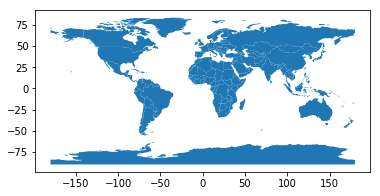

In [205]:
world.plot()

In [206]:
cty_map = pd.read_csv('data/indus_dist.csv', index_col=0)
lat = cty_map['latitude'].values
lon = cty_map['longitude'].values



In [208]:
df = gpd.read_file(gpd.datasets.get_path('tnbb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')


ValueError: The dataset 'tnbb' is not available

In [198]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')


NameError: name 'Basemap' is not defined

In [197]:
cty_map

county  latitude  longitude      Avg_Dist
16494    anderson     36.20     -84.04  32775.820230
16173     bedford     35.59     -86.35   4503.073082
16773      benton     36.23     -88.08   6487.141318
16404     bledsoe     35.60     -85.19   7292.580669
16493      blount     35.79     -83.97  32816.057214
16351     bradley     35.28     -84.76  11929.399282
16501    campbell     36.26     -84.30  31491.241038
16170      cannon     35.94     -86.09   3725.966144
16771     carroll     36.13     -88.51  20598.181770
16466      carter     36.33     -82.23  24372.883496
16169    cheatham     36.27     -87.05   2648.649611
16826     chester     35.38     -88.42  24581.108732
16495   claiborne     36.54     -83.67   6267.533619
16926        clay     36.54     -85.50   7261.123217
16500       cocke     36.04     -83.18  20278.661784
16171      coffee     35.64     -86.20   4715.039209
16645    crockett     35.78     -89.11  11659.947080
16508  cumberland     35.90     -84.88  10241.668680
16165    davidson     36.04     -86.64  14510.638957
16810     decatur     35.44     -88.10   8638.094348
16166      dekalb     36.07     -86.03   4081.667753
16181     dickson     36.05     -87.31   2239.847374
16649        dyer     36.16     -89.43  13430.713571
16651     fayette     35.36     -89.57   2901.346169
16914    fentress     36.38     -84.88  10256.956550
16347    franklin     35.12     -86.18  11911.426964
16784      gibson     36.19     -89.01  14624.583685
16879       giles     35.04     -86.82   7518.914225
16496    grainger     36.34     -83.28  36891.598145
16457      greene     36.23     -82.75   2206.557102
...           ...       ...        ...           ...
16779       obion     36.26     -89.32  32895.323689
16917     overton     36.51     -85.32  26688.919057
16238       perry     35.61     -87.84  12149.103047
16924     pickett     36.57     -85.13   8282.098542
16348        polk     35.17     -84.65  12788.531919
16911      putnam     36.15     -85.50   8453.023438
16361        rhea     35.49     -85.01  20629.490024
16524       roane     35.93     -84.56  29778.389640
16184   robertson     36.55     -87.00  18689.471316
16189  rutherford     35.70     -86.34    534.817458
16516       scott     36.33     -84.60   2967.884058
16367  sequatchie     35.37     -85.38   8762.224680
16519      sevier     35.72     -83.49  15983.972010
16449      shelby     35.10     -90.00      0.000000
16182       smith     36.25     -85.94   4531.307110
16175     stewart     36.59     -87.78  15272.450329
16458    sullivan     36.53     -82.32  42082.532188
16174      sumner     36.50     -86.30  11098.050002
16647      tipton     35.44     -89.77  40540.601410
16221   trousdale     36.39     -86.15   3672.928462
16469      unicoi     36.14     -82.41   8285.460899
16545       union     36.20     -83.74  34345.281234
16956   van_buren     35.74     -85.45   4649.553256
16242      warren     35.68     -85.77   6350.203244
16451  washington     36.33     -82.36  24745.374743
16878       wayne     35.38     -87.99   7708.110893
16777     weakley     36.27     -88.69  10251.012086
16934       white     35.85     -85.51  24685.909315
16168  williamson     35.88     -86.63   2090.985575
16218      wilson     36.08     -86.40  20397.165598

[95 rows x 4 columns]